In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('Car Price.csv')

In [191]:
data.head()

,ID,Date,Company,Model,Detail,ProductionYear,Mileage,BodyCondition,Price
0,122631,22/9/2011,C-4,M-14,D-10,1386,44000,1,20811199
1,115825,17/7/2011,C-4,M-14,D-10,1386,73000,1,0
2,129927,24/9/2011,C-4,M-14,D-10,1388,45000,1,22061121
3,148726,17/1/2012,C-4,M-14,D-10,1387,60000,1,23748515
4,117507,24/11/2011,C-4,M-14,D-10,1390,0,1,0


# Basics Descriptive Statistics

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170989 entries, 0 to 170988
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID              170989 non-null  int64 
 1   Date            170989 non-null  object
 2   Company         170936 non-null  object
 3   Model           170989 non-null  object
 4   Detail          170989 non-null  object
 5   ProductionYear  170989 non-null  int64 
 6   Mileage         170989 non-null  int64 
 7   BodyCondition   170989 non-null  int64 
 8   Price           170989 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 11.7+ MB


In [5]:
data.describe()

,ID,ProductionYear,Mileage,BodyCondition,Price
count,170989.000000,170989.000000,170989.000000,170989.000000,1.709890e+05
mean,85495.000000,1426.480727,50562.379159,2.262385,1.216382e+07
std,49360.416927,152.919277,72097.194357,3.381562,1.813027e+07
min,1.000000,40.000000,-5.000000,1.000000,0.000000e+00
25%,42748.000000,1386.000000,0.000000,1.000000,0.000000e+00
50%,85495.000000,1388.000000,23000.000000,1.000000,8.436972e+06
75%,128242.000000,1389.000000,75000.000000,1.000000,1.468658e+07
max,170989.000000,5100.000000,990000.000000,18.000000,6.249609e+08


In [9]:
np.median(data['Price'])

8436972.0

In [17]:
import statistics as st
st.mode(data['Price'])

0

In [18]:
from collections import Counter
def my_mode(sample):
    c = Counter(sample)
    return [k for k, v in c.items() if v == c.most_common(1)[0][1]]

In [20]:
my_mode(data['Price'])

[0]

In [21]:
st.mean(data['Price'])

12163824.741176333

In [23]:
from scipy.stats import  kurtosis

In [24]:
kurtosis(data['Price'])

26.85703783710492

In [25]:
data.skew(axis = 0, skipna = True)

/var/folders/n3/g8v2fwc15611w5_sqtq9z70w0000gn/T/ipykernel_3976/2341530724.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew(axis = 0, skipna = True)


ID               -4.668466e-18
ProductionYear    3.615099e+00
Mileage           2.712578e+00
BodyCondition     2.841533e+00
Price             4.008276e+00
dtype: float64

In [26]:
data.corr()

,ID,ProductionYear,Mileage,BodyCondition,Price
ID,1.000000,-0.036760,0.071013,0.035547,0.163608
ProductionYear,-0.036760,1.000000,0.014870,-0.057932,0.567476
Mileage,0.071013,0.014870,1.000000,0.349754,-0.036394
BodyCondition,0.035547,-0.057932,0.349754,1.000000,-0.065623
Price,0.163608,0.567476,-0.036394,-0.065623,1.000000


# Missing Value Visualization

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

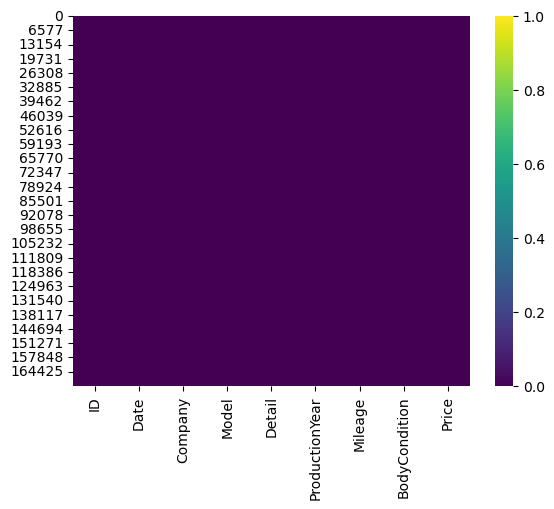

In [28]:
sns.heatmap(data.isnull(), cmap='viridis')
plt.show()

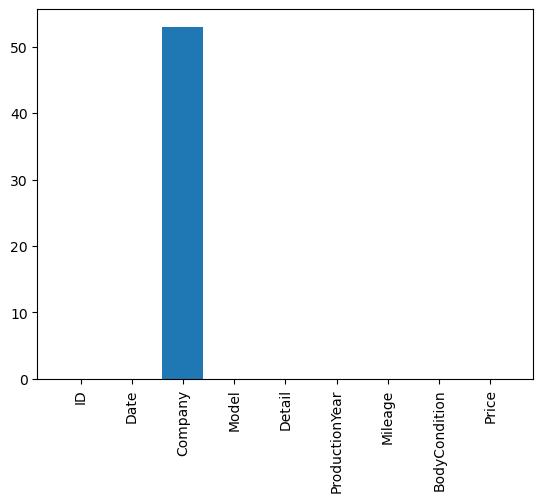

In [29]:
missing_values = data.isnull().sum()

plt.bar(missing_values.index, missing_values.values)
plt.xticks(rotation=90)
plt.show()

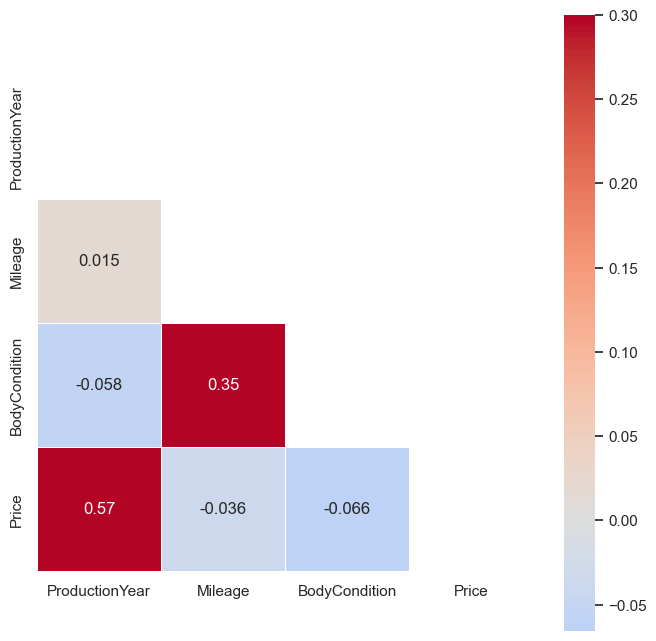

In [41]:
plt.figure(figsize=(8,8))
corr=data[data.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(data[data.columns[1:]].corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

# Graphical Representation

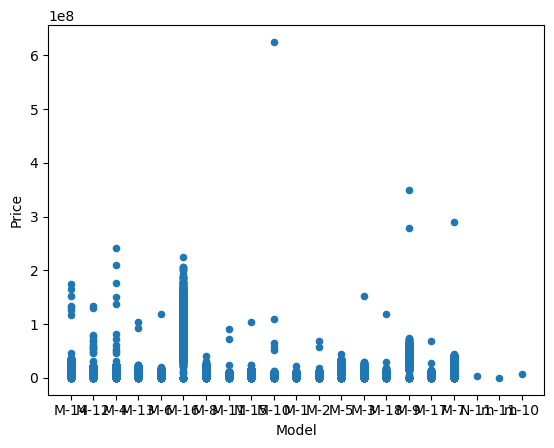

In [31]:
#scatter
data.plot(kind='scatter', x='Model', y='Price')
plt.show()

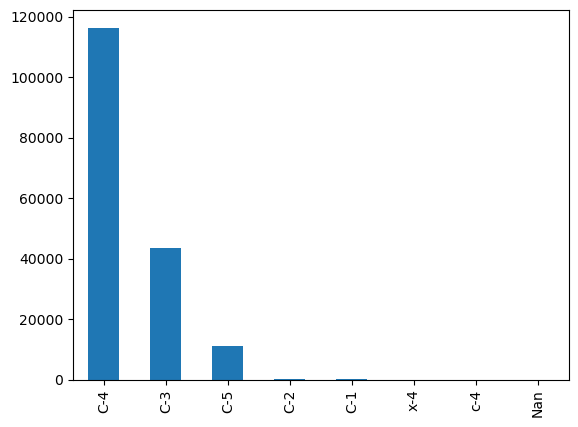

In [33]:
#bar chart
data['Company'].value_counts().plot(kind='bar')
plt.show()

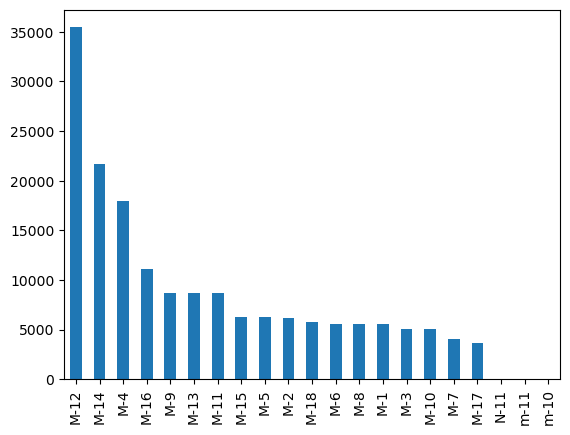

In [34]:
data['Model'].value_counts().plot(kind='bar')
plt.show()

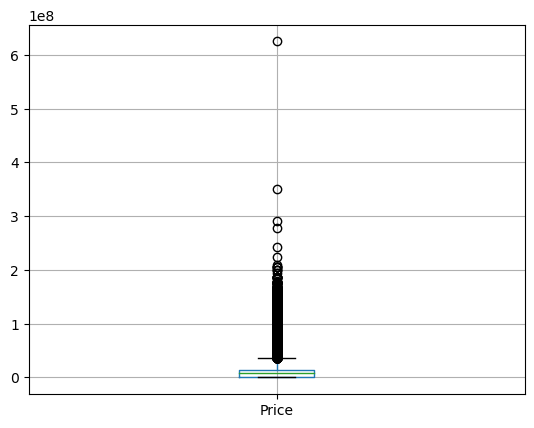

In [36]:
#box plot
data.boxplot(column='Price')
plt.show()

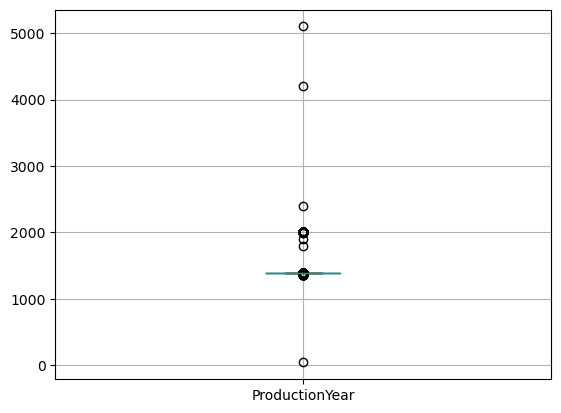

In [37]:
data.boxplot(column='ProductionYear')
plt.show()

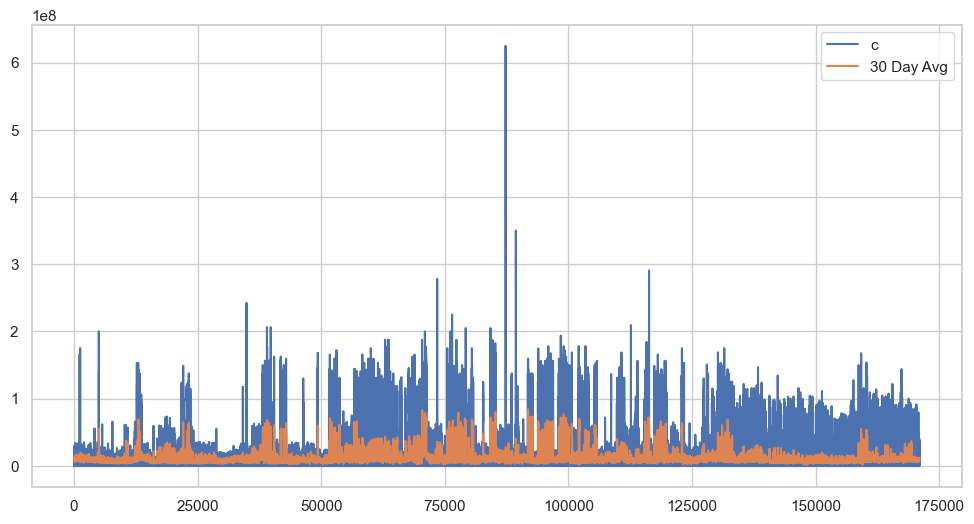

In [39]:
sns.set()
sns.set_style('whitegrid')
data['Price'].plot(figsize=(12,6),label='c')
data['Price'].rolling(window=30).mean().plot(label='30 Day Avg')
plt.legend()

/Users/mostafanikoo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

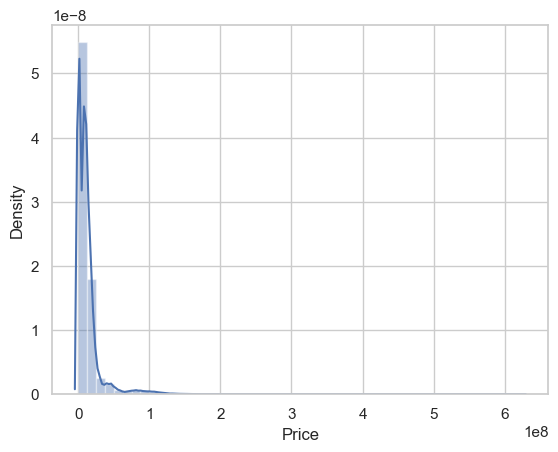

In [44]:
sns.distplot(data.Price)

# Handling missing value

In [45]:
#data = data.dropna()
#---------
# mean_value = data['column'].mean()
# data['column'] = data['column'].fillna(mean_value)

# # Impute missing values with median
# median_value = data['column'].median()
# data['column'] = data['column'].fillna(median_value)

# Univariate Analysis

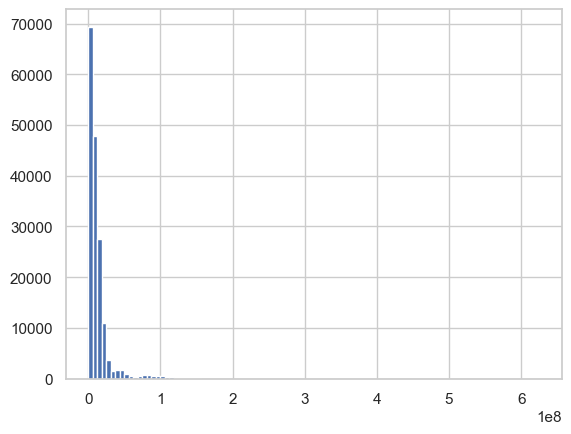

In [51]:
plt.hist(data['Price'], bins=100)
plt.show()

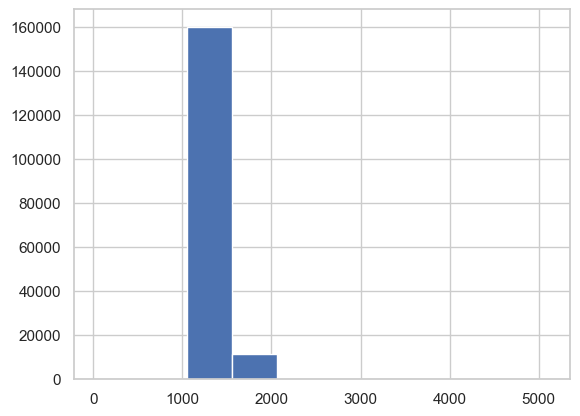

In [55]:
plt.hist(data['ProductionYear'], bins=10)
plt.show()

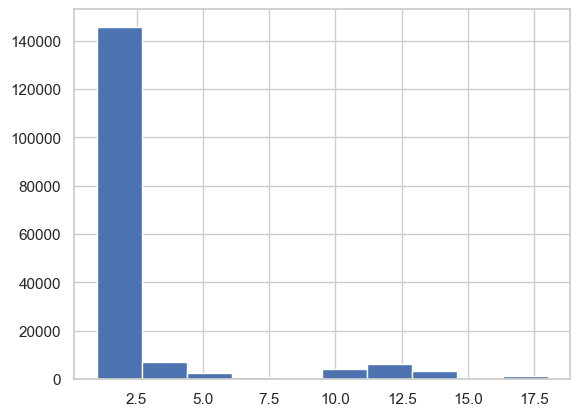

In [56]:
plt.hist(data['BodyCondition'], bins=10)
plt.show()

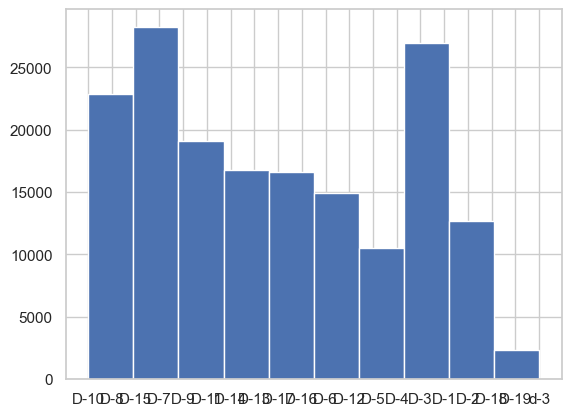

In [59]:
plt.hist(data['Detail'], bins=10)
plt.show()

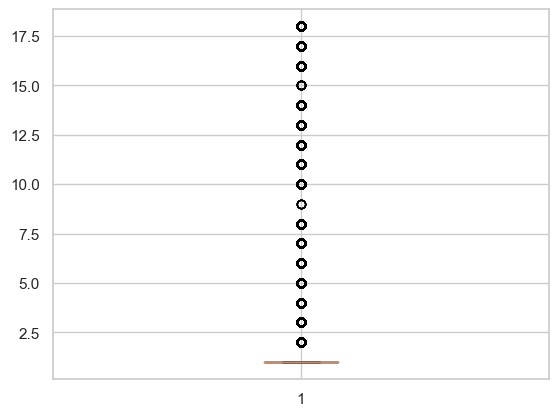

In [61]:
plt.boxplot(data['BodyCondition'])
plt.show()

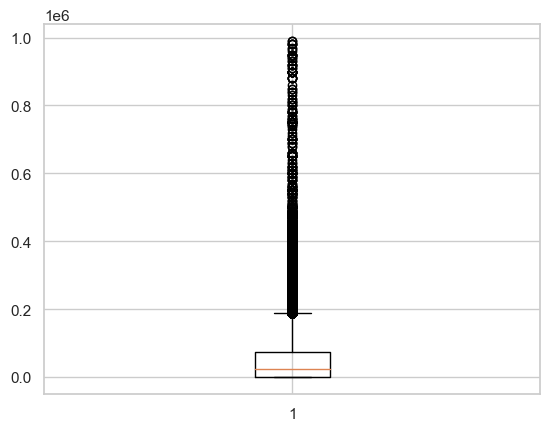

In [62]:
plt.boxplot(data['Mileage'])
plt.show()

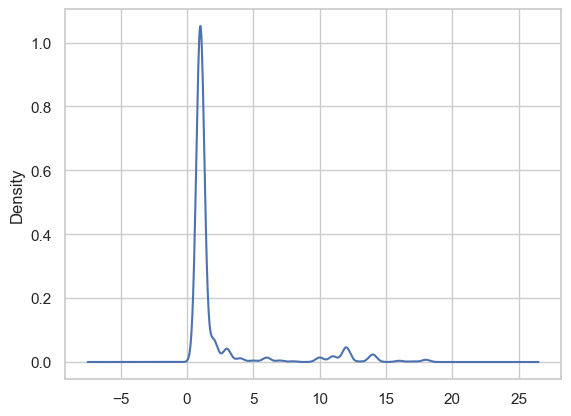

In [63]:
data['BodyCondition'].plot(kind='density')
plt.show()

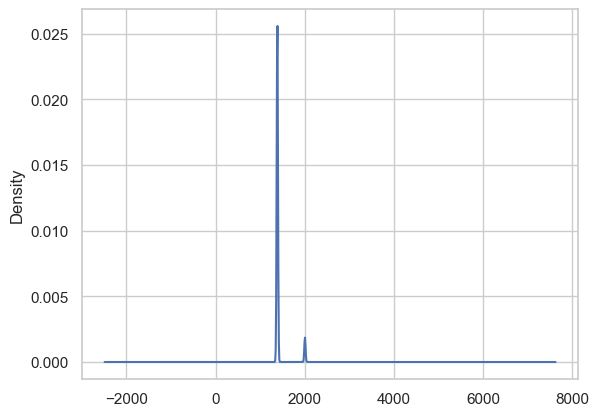

In [64]:
data['ProductionYear'].plot(kind='density')
plt.show()

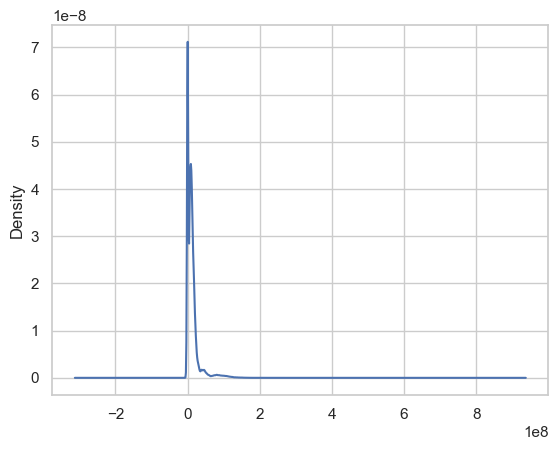

In [65]:
data['Price'].plot(kind='density')
plt.show()

In [68]:
mean_value = data['Price'].mean()
median_value = data['Price'].median()
std_value = data['Price'].std()
min_value = data['Price'].min()
max_value = data['Price'].max()
print(mean_value,'---',median_value,'----',std_value,'----',min_value,'-----',max_value)

12163824.741176333 --- 8436972.0 ---- 18130269.223867513 ---- 0 ----- 624960939


In [69]:
freq_price = data['Price'].value_counts()
freq_ProductionYear = data['ProductionYear'].value_counts()
freq_Company = data['Company'].value_counts()
freq_Mileage = data['Mileage'].value_counts()

In [71]:
freq_price

0            49120
9374414       1315
10936816      1257
12499218      1219
13124179      1199
             ...  
145615899        1
139991250        1
23029810         1
1187425          1
6087119          1
Name: Price, Length: 2370, dtype: int64

In [73]:
freq_Company

C-4    116391
C-3     43436
C-5     11050
C-2        40
C-1        12
x-4         5
c-4         1
Nan         1
Name: Company, dtype: int64

In [72]:
freq_dist = data.apply(pd.Series.value_counts)

# Display the result
print(freq_dist)

      ID  Date  Company  Model  Detail  ProductionYear  Mileage  \
-5   NaN   NaN      NaN    NaN     NaN             NaN      4.0   
-4   NaN   NaN      NaN    NaN     NaN             NaN    111.0   
-2   NaN   NaN      NaN    NaN     NaN             NaN   6947.0   
-1   NaN   NaN      NaN    NaN     NaN             NaN   2747.0   
0    NaN   NaN      NaN    NaN     NaN             NaN  50286.0   
...   ..   ...      ...    ...     ...             ...      ...   
c-4  NaN   NaN      1.0    NaN     NaN             NaN      NaN   
d-3  NaN   NaN      NaN    NaN     1.0             NaN      NaN   
m-10 NaN   NaN      NaN    1.0     NaN             NaN      NaN   
m-11 NaN   NaN      NaN    1.0     NaN             NaN      NaN   
x-4  NaN   NaN      5.0    NaN     NaN             NaN      NaN   

      BodyCondition    Price  
-5              NaN      NaN  
-4              NaN      NaN  
-2              NaN      NaN  
-1              NaN      NaN  
0               NaN  49120.0  
...      

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170989 entries, 0 to 170988
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID              170989 non-null  int64 
 1   Date            170989 non-null  object
 2   Company         170936 non-null  object
 3   Model           170989 non-null  object
 4   Detail          170989 non-null  object
 5   ProductionYear  170989 non-null  int64 
 6   Mileage         170989 non-null  int64 
 7   BodyCondition   170989 non-null  int64 
 8   Price           170989 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 11.7+ MB


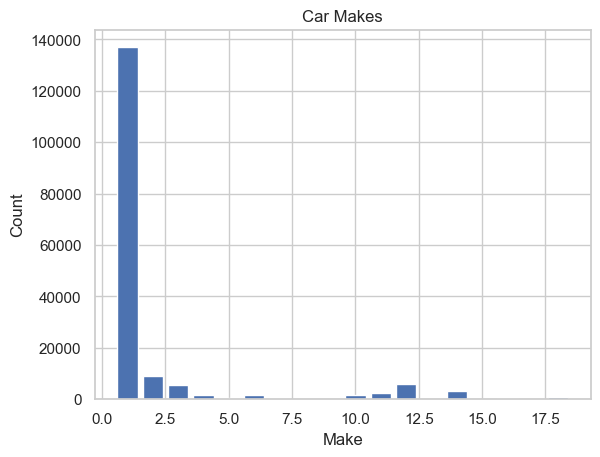

In [85]:
make_counts = data['BodyCondition'].value_counts()
plt.bar(make_counts.index, make_counts.values)
plt.title('Car Makes')
plt.xlabel('Make')
plt.ylabel('Count')

# Show plot
plt.show()

In [89]:
make_counts = data['Model'].value_counts()
print(make_counts)

M-12    35451
M-14    21639
M-4     17985
M-16    11068
M-9      8687
M-13     8659
M-11     8628
M-15     6259
M-5      6236
M-2      6196
M-18     5753
M-6      5586
M-8      5535
M-1      5511
M-3      5086
M-10     5004
M-7      4023
M-17     3680
N-11        1
m-11        1
m-10        1
Name: Model, dtype: int64


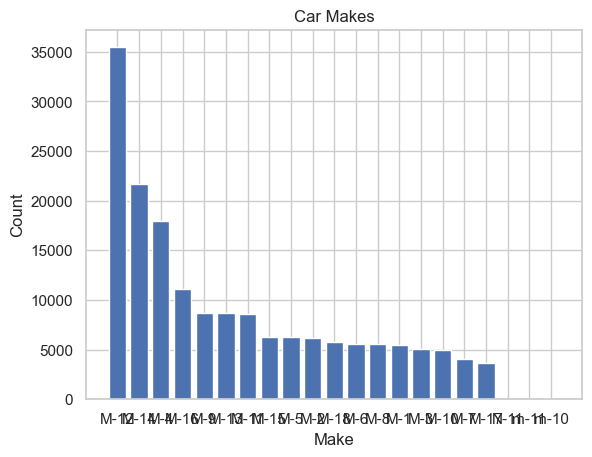

In [90]:
make_counts = data['Model'].value_counts()
plt.bar(make_counts.index, make_counts.values)

# Set plot title and axis labels
plt.title('Car ')
plt.xlabel('Make')
plt.ylabel('Count')

# Show plot
plt.show()

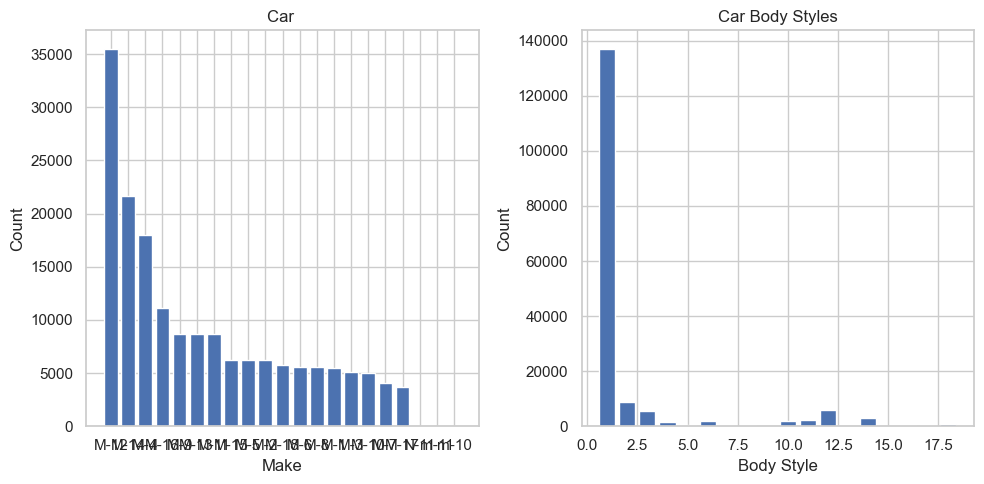

In [92]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot bar chart for make
make_counts = data['Model'].value_counts()
axs[0].bar(make_counts.index, make_counts.values)
axs[0].set_title('Car ')
axs[0].set_xlabel('Make')
axs[0].set_ylabel('Count')

# Plot bar chart for body_style
body_style_counts = data['BodyCondition'].value_counts()
axs[1].bar(body_style_counts.index, body_style_counts.values)
axs[1].set_title('Car Body Styles')
axs[1].set_xlabel('Body Style')
axs[1].set_ylabel('Count')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

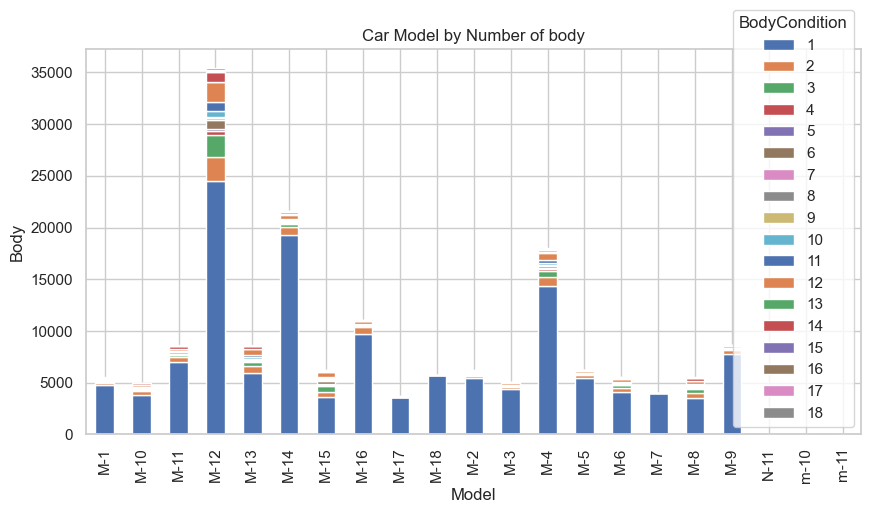

In [96]:
freq_table = pd.crosstab(index=data['Model'], columns=data['BodyCondition'])
ax = freq_table.plot(kind='bar', stacked=True, figsize=(10, 5))

# Set plot title and axis labels
ax.set_title('Car Model by Number of body')
ax.set_xlabel('Model')
ax.set_ylabel('Body')

# Show plot
plt.show()

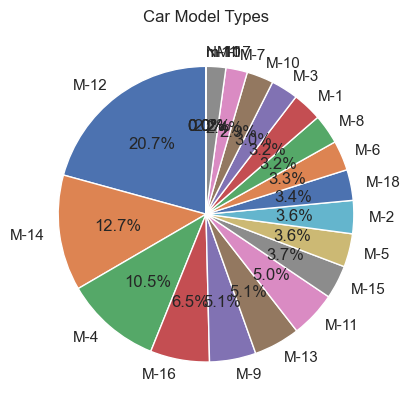

In [99]:
freq_table = data['Model'].value_counts()

# Create pie chart
plt.pie(freq_table.values, labels=freq_table.index, autopct='%1.1f%%', startangle=90)

# Set plot title
plt.title('Car Model Types')

# Show plot
plt.show()

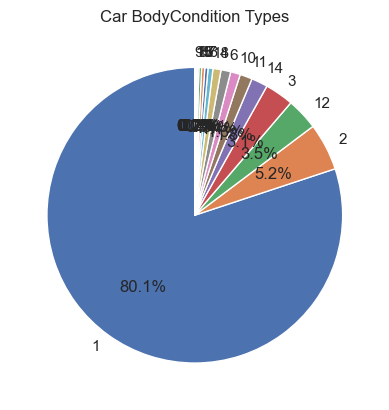

In [100]:
freq_table = data['BodyCondition'].value_counts()

# Create pie chart
plt.pie(freq_table.values, labels=freq_table.index, autopct='%1.1f%%', startangle=90)

# Set plot title
plt.title('Car BodyCondition Types')

# Show plot
plt.show()

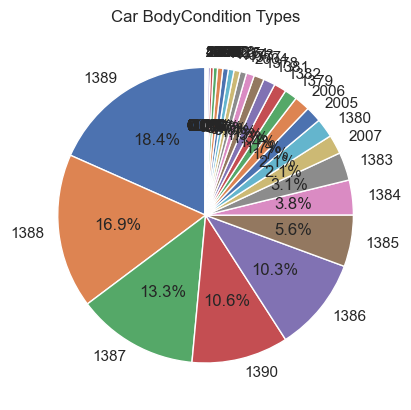

In [101]:
freq_table = data['ProductionYear'].value_counts()

# Create pie chart
plt.pie(freq_table.values, labels=freq_table.index, autopct='%1.1f%%', startangle=90)

# Set plot title
plt.title('Car BodyCondition Types')

# Show plot
plt.show()

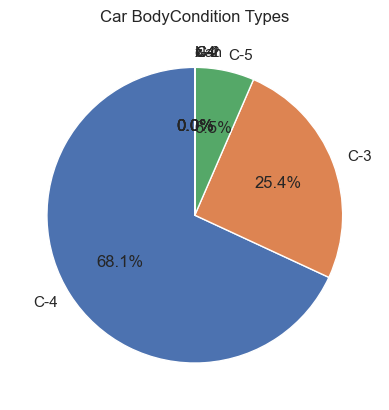

In [102]:
freq_table = data['Company'].value_counts()

# Create pie chart
plt.pie(freq_table.values, labels=freq_table.index, autopct='%1.1f%%', startangle=90)

# Set plot title
plt.title('Car BodyCondition Types')

# Show plot
plt.show()

#  Bivariate Analysis

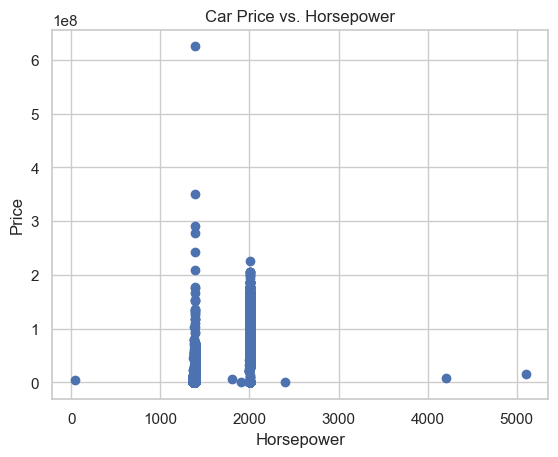

In [103]:
#scatter
plt.scatter(data['ProductionYear'], data['Price'])

# Set plot title and labels
plt.title('Car Price vs. Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Price')

# Show plot
plt.show()

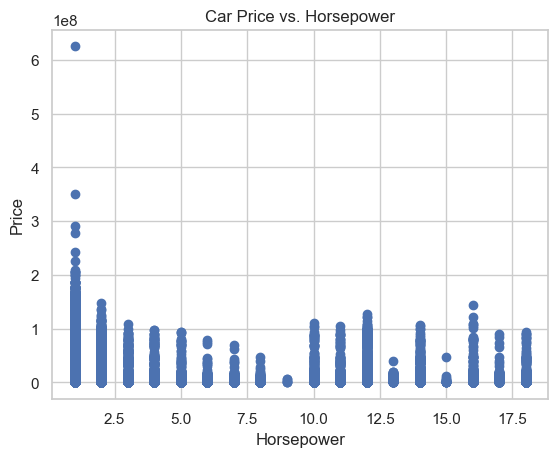

In [104]:
#scatter
plt.scatter(data['BodyCondition'], data['Price'])

# Set plot title and labels
plt.title('Car Price vs. Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Price')

# Show plot
plt.show()

In [106]:
corr_coef = data['BodyCondition'].corr(data['Price'])

# Print correlation coefficient
print('Correlation Coefficient:', corr_coef)


Correlation Coefficient: -0.06562306553251672


In [107]:
corr_coef = data['ProductionYear'].corr(data['Price'])

# Print correlation coefficient
print('Correlation Coefficient:', corr_coef)

Correlation Coefficient: 0.5674758667069901


In [109]:
corr_coef = data['Mileage'].corr(data['Price'])

# Print correlation coefficient
print('Correlation Coefficient:', corr_coef)

Correlation Coefficient: -0.03639362785172278


In [111]:
cross_tab = pd.crosstab(data['Price'], data['BodyCondition'])
print(cross_tab)

BodyCondition     1     2     3    4    5    6    7    8   9    10   11    12  \
Price                                                                           
0              41779  2083  1072  373  122  346  108  179   3  371  443  1322   
6249               1     0     0    0    0    0    0    0   0    0    0     0   
62496              2     0     0    0    0    0    0    0   0    0    0     0   
69440              4     0     0    0    0    0    0    0   0    0    0     0   
120617             1     0     0    0    0    0    0    0   0    0    0     0   
...              ...   ...   ...  ...  ...  ...  ...  ...  ..  ...  ...   ...   
242484844          1     0     0    0    0    0    0    0   0    0    0     0   
278107618          1     0     0    0    0    0    0    0   0    0    0     0   
290606837          1     0     0    0    0    0    0    0   0    0    0     0   
349978126          1     0     0    0    0    0    0    0   0    0    0     0   
624960939          1     0  

In [112]:
cross_tab = pd.crosstab(data['Price'], data['ProductionYear'])
print(cross_tab)

ProductionYear  40    1361  1362  1363  1364  1365  1366  1367  1368  1369  \
Price                                                                        
0                  0     1     4     3     5     1     5    15     8    19   
6249               0     0     0     0     0     0     0     0     0     0   
62496              0     0     0     0     0     0     0     0     0     0   
69440              0     0     0     0     0     0     0     0     0     0   
120617             0     0     0     0     0     0     0     0     0     0   
...              ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
242484844          0     0     0     0     0     0     0     0     0     0   
278107618          0     0     0     0     0     0     0     0     0     0   
290606837          0     0     0     0     0     0     0     0     0     0   
349978126          0     0     0     0     0     0     0     0     0     0   
624960939          0     0     0     0     0     0     0     0  

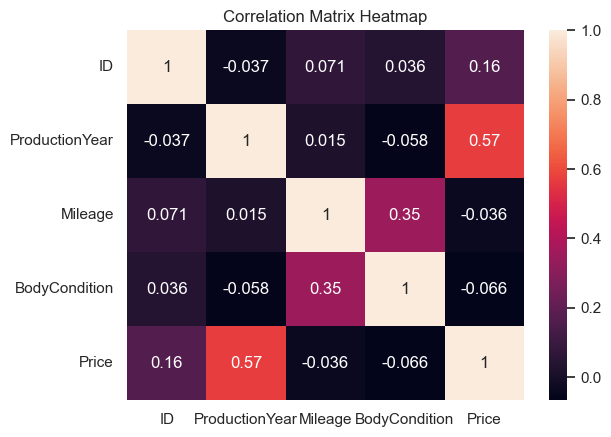

In [113]:
corr_matrix = data.corr()

# Create heatmap
sns.heatmap(corr_matrix, annot=True)

# Set plot title
plt.title('Correlation Matrix Heatmap')

# Show plot
plt.show()

In [114]:
import statsmodels.api as sm
X = data['Mileage']
y = data['Price']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     226.8
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           3.25e-51
Time:                        22:25:19   Log-Likelihood:            -3.1003e+06
No. Observations:              170989   AIC:                         6.201e+06
Df Residuals:                  170987   BIC:                         6.201e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.263e+07   5.35e+04    235.934      0.0

In [115]:
orr_coef = data['BodyCondition'].corr(data['Price'])

# Print correlation coefficient
print("The correlation coefficient between BodyCondition and price is:", corr_coef)

The correlation coefficient between BodyCondition and price is: -0.03639362785172278


In [117]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['BodyCondition'], data['Price'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print test results
print("Chi-square value: ", chi2)
print("p-value: ", p)
print("Degrees of freedom: ", dof)
print("Expected frequencies: ")
print(expected)

Chi-square value:  53152.45097726726
p-value:  0.0
Degrees of freedom:  40273
Expected frequencies: 
[[3.93373094e+04 8.00840990e-01 1.60168198e+00 ... 8.00840990e-01
  8.00840990e-01 8.00840990e-01]
 [2.54262625e+03 5.17635637e-02 1.03527127e-01 ... 5.17635637e-02
  5.17635637e-02 5.17635637e-02]
 [1.54350139e+03 3.14230740e-02 6.28461480e-02 ... 3.14230740e-02
  3.14230740e-02 3.14230740e-02]
 ...
 [1.44496780e+02 2.94170970e-03 5.88341940e-03 ... 2.94170970e-03
  2.94170970e-03 2.94170970e-03]
 [7.67010743e+01 1.56150396e-03 3.12300791e-03 ... 1.56150396e-03
  1.56150396e-03 1.56150396e-03]
 [2.61990187e+02 5.33367644e-03 1.06673529e-02 ... 5.33367644e-03
  5.33367644e-03 5.33367644e-03]]


In [118]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['Mileage'], data['Price'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print test results
print("Chi-square value: ", chi2)
print("p-value: ", p)
print("Degrees of freedom: ", dof)
print("Expected frequencies: ")
print(expected)

Chi-square value:  9079919.34364042
p-value:  0.0
Degrees of freedom:  7038299
Expected frequencies: 
[[1.14907977e+00 2.33933177e-05 4.67866354e-05 ... 2.33933177e-05
  2.33933177e-05 2.33933177e-05]
 [3.18869635e+01 6.49164566e-04 1.29832913e-03 ... 6.49164566e-04
  6.49164566e-04 6.49164566e-04]
 [1.99566428e+03 4.06283445e-02 8.12566890e-02 ... 4.06283445e-02
  4.06283445e-02 4.06283445e-02]
 ...
 [2.87269941e-01 5.84832942e-06 1.16966588e-05 ... 5.84832942e-06
  5.84832942e-06 5.84832942e-06]
 [1.14907977e+00 2.33933177e-05 4.67866354e-05 ... 2.33933177e-05
  2.33933177e-05 2.33933177e-05]
 [5.74539883e-01 1.16966588e-05 2.33933177e-05 ... 1.16966588e-05
  1.16966588e-05 1.16966588e-05]]


In [119]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['ProductionYear'], data['Price'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print test results
print("Chi-square value: ", chi2)
print("p-value: ", p)
print("Degrees of freedom: ", dof)
print("Expected frequencies: ")
print(expected)

Chi-square value:  365859.95817329944
p-value:  0.0
Degrees of freedom:  113712
Expected frequencies: 
[[2.87269941e-01 5.84832942e-06 1.16966588e-05 ... 5.84832942e-06
  5.84832942e-06 5.84832942e-06]
 [2.87269941e-01 5.84832942e-06 1.16966588e-05 ... 5.84832942e-06
  5.84832942e-06 5.84832942e-06]
 [2.29815953e+00 4.67866354e-05 9.35732708e-05 ... 4.67866354e-05
  4.67866354e-05 4.67866354e-05]
 ...
 [2.87269941e-01 5.84832942e-06 1.16966588e-05 ... 5.84832942e-06
  5.84832942e-06 5.84832942e-06]
 [2.87269941e-01 5.84832942e-06 1.16966588e-05 ... 5.84832942e-06
  5.84832942e-06 5.84832942e-06]
 [2.87269941e-01 5.84832942e-06 1.16966588e-05 ... 5.84832942e-06
  5.84832942e-06 5.84832942e-06]]


In [132]:
#z-test t-test
data['BodyCondition'].describe()

count    170989.000000
mean          2.262385
std           3.381562
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          18.000000
Name: BodyCondition, dtype: float64

In [129]:
data.head()

,ID,Date,Company,Model,Detail,ProductionYear,Mileage,BodyCondition,Price
0,122631,22/9/2011,C-4,M-14,D-10,1386,44000,1,20811199
1,115825,17/7/2011,C-4,M-14,D-10,1386,73000,1,0
2,129927,24/9/2011,C-4,M-14,D-10,1388,45000,1,22061121
3,148726,17/1/2012,C-4,M-14,D-10,1387,60000,1,23748515
4,117507,24/11/2011,C-4,M-14,D-10,1390,0,1,0


In [164]:
unique_values = data['BodyCondition'].unique()
unique_values

array([ 1,  2,  3,  4,  8,  6, 10,  9,  5, 11, 12,  7, 14, 18, 13, 15, 16,
       17])

In [141]:
#anova
data.head()

,ID,Date,Company,Model,Detail,ProductionYear,Mileage,BodyCondition,Price
0,122631,22/9/2011,C-4,M-14,D-10,1386,44000,1,20811199
1,115825,17/7/2011,C-4,M-14,D-10,1386,73000,1,0
2,129927,24/9/2011,C-4,M-14,D-10,1388,45000,1,22061121
3,148726,17/1/2012,C-4,M-14,D-10,1387,60000,1,23748515
4,117507,24/11/2011,C-4,M-14,D-10,1390,0,1,0


In [142]:
data['Price'].mean()

12163824.741176333

In [143]:
data.groupby('BodyCondition').mean()

,ID,ProductionYear,Mileage,Price
BodyCondition,,,,
1,84705.683069,1431.482828,32800.831029,1.293825e+07
2,86566.241329,1425.021241,95749.168682,1.128791e+07
3,85647.134003,1392.279732,160452.719337,6.811210e+06
4,91379.342438,1420.559627,114113.551632,9.285037e+06
5,89315.039587,1413.555938,120743.621343,9.589331e+06
6,92414.420210,1378.840420,216721.138045,4.780481e+06
7,88429.504119,1384.553542,180784.833608,5.479244e+06
8,93339.133094,1395.345324,91710.597122,3.031398e+06
9,91979.166667,1379.666667,192500.000000,2.812324e+06


In [145]:
from statsmodels.formula.api import ols

In [147]:
result = ols('Price~BodyCondition',data=data).fit()

In [148]:
sm.stats.anova_lm(result)

,df,sum_sq,mean_sq,F,PR(>F)
BodyCondition,1.0,2.420400e+17,2.420400e+17,739.52081,1.695041e-162
Residual,170987.0,5.596285e+19,3.272930e+14,NaN,NaN


In [150]:
data['avg_price'] = data['Price'].mean()

In [152]:
sum_sq = sum((data['Price'] - data['avg_price'])**2)
sum_sq

5.620489474427034e+19

In [156]:
gMean = data.groupby('BodyCondition').mean()[['Price']]
gMean

,Price
BodyCondition,
1,1.293825e+07
2,1.128791e+07
3,6.811210e+06
4,9.285037e+06
5,9.589331e+06
6,4.780481e+06
7,5.479244e+06
8,3.031398e+06
9,2.812324e+06


In [158]:
gMean = gMean.rename(columns={'Price':'Gmean'})

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170989 entries, 0 to 170988
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              170989 non-null  int64  
 1   Date            170989 non-null  object 
 2   Company         170936 non-null  object 
 3   Model           170989 non-null  object 
 4   Detail          170989 non-null  object 
 5   ProductionYear  170989 non-null  int64  
 6   Mileage         170989 non-null  int64  
 7   BodyCondition   170989 non-null  int64  
 8   Price           170989 non-null  int64  
 9   avg_price       170989 non-null  float64
dtypes: float64(1), int64(5), object(4)
memory usage: 13.0+ MB


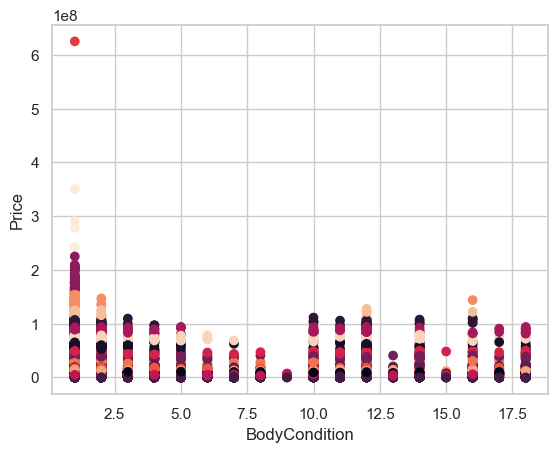

In [167]:
from sklearn.cluster import KMeans
X = data[['BodyCondition', 'Price']]

# Choose number of clusters
k = 18

# Perform k-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# Get cluster labels
labels = kmeans.labels_

# Visualize results
plt.scatter(X['BodyCondition'], X['Price'], c=labels)
plt.xlabel('BodyCondition')
plt.ylabel('Price')
plt.show()

In [168]:
#pca
from sklearn.decomposition import PCA,KernelPCA

In [177]:
cat_vars = ['Company', 'Model', 'Detail']

In [174]:
const_col = data[['ProductionYear','Mileage','BodyCondition']]
print(const_col.isna().sum())
pca =PCA(1).fit(const_col)
x =pca.transform(const_col)
x

ProductionYear    0
Mileage           0
BodyCondition     0
dtype: int64


array([[-6562.38045217],
       [22437.61952951],
       [-5562.38038972],
       ...,
       [35437.61970301],
       [89437.61960581],
       [84437.61957743]])

In [175]:
len(x)

170989

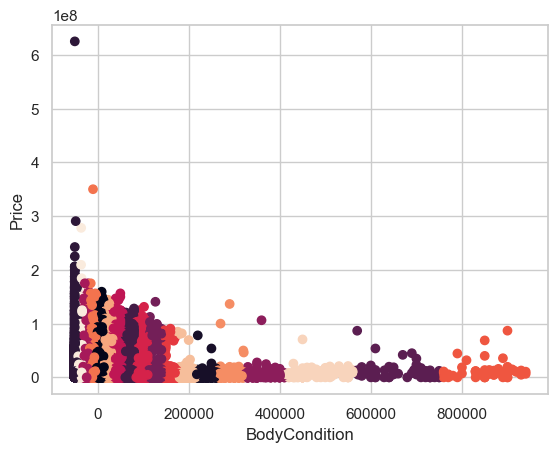

In [176]:
k = 18

# Perform k-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(x)

# Get cluster labels
labels = kmeans.labels_

# Visualize results
plt.scatter(x, X['Price'], c=labels)
plt.xlabel('BodyCondition')
plt.ylabel('Price')
plt.show()

# remove irrelevant

In [187]:
data = data.drop(['Date', 'avg_price'], axis=1,inplace=True)

In [192]:
data.head()

,ID,Date,Company,Model,Detail,ProductionYear,Mileage,BodyCondition,Price
0,122631,22/9/2011,C-4,M-14,D-10,1386,44000,1,20811199
1,115825,17/7/2011,C-4,M-14,D-10,1386,73000,1,0
2,129927,24/9/2011,C-4,M-14,D-10,1388,45000,1,22061121
3,148726,17/1/2012,C-4,M-14,D-10,1387,60000,1,23748515
4,117507,24/11/2011,C-4,M-14,D-10,1390,0,1,0


In [197]:
data.head()

,ID,Company,Model,Detail,ProductionYear,Mileage,BodyCondition,Price
0,122631,C-4,M-14,D-10,1386,44000,1,20811199
1,115825,C-4,M-14,D-10,1386,73000,1,0
2,129927,C-4,M-14,D-10,1388,45000,1,22061121
3,148726,C-4,M-14,D-10,1387,60000,1,23748515
4,117507,C-4,M-14,D-10,1390,0,1,0


In [198]:
data.drop(['ID'],inplace=True,axis=1)

In [200]:
data

,Company,Model,Detail,ProductionYear,Mileage,BodyCondition,Price
0,C-4,M-14,D-10,1386,44000,1,20811199
1,C-4,M-14,D-10,1386,73000,1,0
2,C-4,M-14,D-10,1388,45000,1,22061121
3,C-4,M-14,D-10,1387,60000,1,23748515
4,C-4,M-14,D-10,1390,0,1,0
...,...,...,...,...,...,...,...
170984,C-4,M-4,D-14,1383,111000,14,0
170985,C-4,M-6,D-13,1382,160000,14,4812199
170986,C-4,M-13,D-9,1385,86000,14,5593400
170987,C-4,M-13,D-9,1383,140000,14,9374414


# Remove Deduplicate

In [201]:
df = data.drop_duplicates()

In [204]:
df

,Company,Model,Detail,ProductionYear,Mileage,BodyCondition,Price
0,C-4,M-14,D-10,1386,44000,1,20811199
1,C-4,M-14,D-10,1386,73000,1,0
2,C-4,M-14,D-10,1388,45000,1,22061121
3,C-4,M-14,D-10,1387,60000,1,23748515
4,C-4,M-14,D-10,1390,0,1,0
...,...,...,...,...,...,...,...
170984,C-4,M-4,D-14,1383,111000,14,0
170985,C-4,M-6,D-13,1382,160000,14,4812199
170986,C-4,M-13,D-9,1385,86000,14,5593400
170987,C-4,M-13,D-9,1383,140000,14,9374414


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108606 entries, 0 to 170988
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Company         108554 non-null  object
 1   Model           108606 non-null  object
 2   Detail          108606 non-null  object
 3   ProductionYear  108606 non-null  int64 
 4   Mileage         108606 non-null  int64 
 5   BodyCondition   108606 non-null  int64 
 6   Price           108606 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 6.6+ MB


In [209]:
df = df.dropna(axis=0)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108554 entries, 0 to 170988
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Company         108554 non-null  object
 1   Model           108554 non-null  object
 2   Detail          108554 non-null  object
 3   ProductionYear  108554 non-null  int64 
 4   Mileage         108554 non-null  int64 
 5   BodyCondition   108554 non-null  int64 
 6   Price           108554 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 6.6+ MB


In [211]:
df.isna().sum()

Company           0
Model             0
Detail            0
ProductionYear    0
Mileage           0
BodyCondition     0
Price             0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170989 entries, 0 to 170988
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID              170989 non-null  int64 
 1   Date            170989 non-null  object
 2   Company         170936 non-null  object
 3   Model           170989 non-null  object
 4   Detail          170989 non-null  object
 5   ProductionYear  170989 non-null  int64 
 6   Mileage         170989 non-null  int64 
 7   BodyCondition   170989 non-null  int64 
 8   Price           170989 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 11.7+ MB


In [8]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression

# Base on Time

In [10]:
#data split on time
data['Date'] = pd.to_datetime(data['Date'])

/var/folders/n3/g8v2fwc15611w5_sqtq9z70w0000gn/T/ipykernel_833/954288720.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170989 entries, 0 to 170988
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ID              170989 non-null  int64         
 1   Date            170989 non-null  datetime64[ns]
 2   Company         170936 non-null  object        
 3   Model           170989 non-null  object        
 4   Detail          170989 non-null  object        
 5   ProductionYear  170989 non-null  int64         
 6   Mileage         170989 non-null  int64         
 7   BodyCondition   170989 non-null  int64         
 8   Price           170989 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 11.7+ MB


In [13]:
data.head()

,ID,Date,Company,Model,Detail,ProductionYear,Mileage,BodyCondition,Price
0,122631,2011-09-22,C-4,M-14,D-10,1386,44000,1,20811199
1,115825,2011-07-17,C-4,M-14,D-10,1386,73000,1,0
2,129927,2011-09-24,C-4,M-14,D-10,1388,45000,1,22061121
3,148726,2012-01-17,C-4,M-14,D-10,1387,60000,1,23748515
4,117507,2011-11-24,C-4,M-14,D-10,1390,0,1,0


In [50]:
df = data.copy()

In [15]:
df.set_index('Date', inplace=True)

In [51]:
df.drop(['Company', 'Model','Detail'], axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170989 entries, 0 to 170988
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ID              170989 non-null  int64         
 1   Date            170989 non-null  datetime64[ns]
 2   ProductionYear  170989 non-null  int64         
 3   Mileage         170989 non-null  int64         
 4   BodyCondition   170989 non-null  int64         
 5   Price           170989 non-null  int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 7.8 MB


In [22]:
df.head()

,ID,ProductionYear,Mileage,BodyCondition,Price
Date,,,,,
2011-09-22,122631,1386,44000,1,20811199
2011-07-17,115825,1386,73000,1,0
2011-09-24,129927,1388,45000,1,22061121
2012-01-17,148726,1387,60000,1,23748515
2011-11-24,117507,1390,0,1,0


In [24]:
tscv = TimeSeriesSplit(n_splits=5)
mae_list = []
for train_index, test_index in tscv.split(df):

    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]
    
    X_train_time = train_data.drop('Price', axis=1)
    y_train_time = train_data['Price']
    X_test_time = test_data.drop('Price', axis=1)
    y_test_time = test_data['Price']
    
    model = LinearRegression()
    model.fit(X_train_time, y_train_time)
    
    y_pred = model.predict(X_test_time)
    
    mae = abs(y_pred - y_test_time).mean()
    mae_list.append(mae)

print('Mean MAE:', sum(mae_list) / len(mae_list))

Mean MAE: 9290828.758699069


In [25]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

print("Shape of training set:", train_df.shape)
print("Shape of test set:", test_df.shape)

Shape of training set: (119692, 5)
Shape of test set: (51297, 5)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170989 entries, 0 to 170988
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ID              170989 non-null  int64         
 1   Date            170989 non-null  datetime64[ns]
 2   ProductionYear  170989 non-null  int64         
 3   Mileage         170989 non-null  int64         
 4   BodyCondition   170989 non-null  int64         
 5   Price           170989 non-null  int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 7.8 MB


# outliers
## 1.boxplot

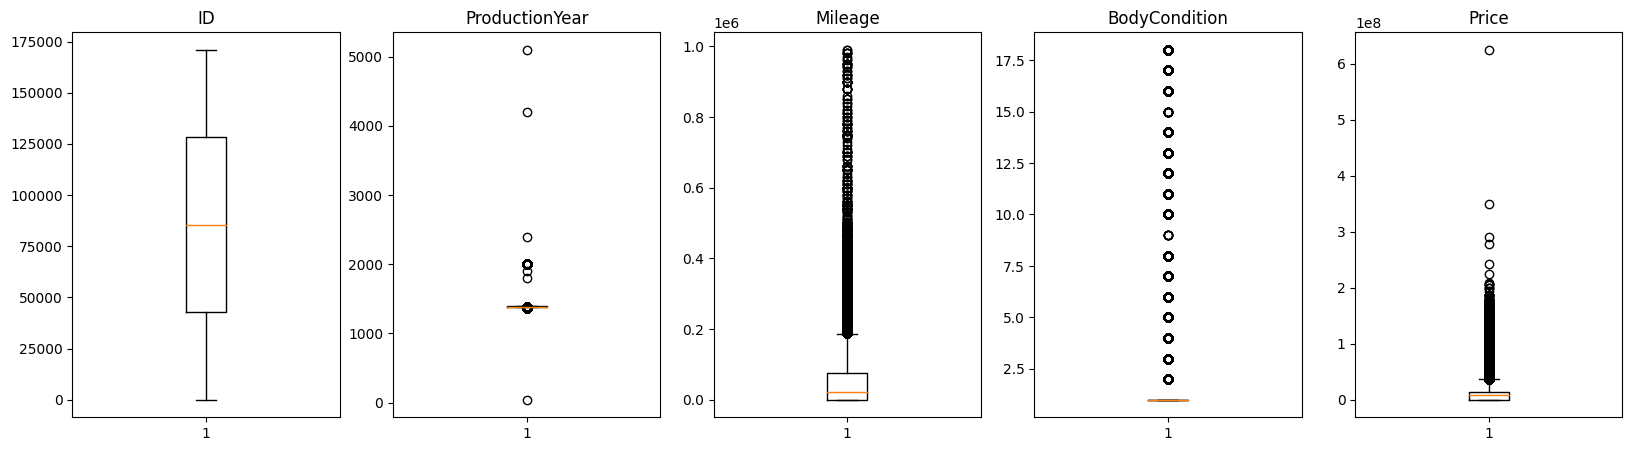

In [33]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=5, figsize=(20, 5))
for i, col in enumerate(df.select_dtypes(include=[float, int])):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)
plt.show()

## 2.Z-Score

In [35]:
from scipy.stats import zscore
z = df.select_dtypes(include=[float, int]).apply(zscore)
print(z)

              ID  ProductionYear   Mileage  BodyCondition     Price
0       0.752346       -0.264720 -0.091022      -0.373315  0.476959
1       0.614462       -0.264720  0.311214      -0.373315 -0.670914
2       0.900157       -0.251642 -0.077151      -0.373315  0.545901
3       1.281010       -0.258181  0.130902      -0.373315  0.638971
4       0.648538       -0.238563 -0.701311      -0.373315 -0.670914
...          ...             ...       ...            ...       ...
170984 -0.022528       -0.284339  0.838282       3.471073 -0.670914
170985 -1.191930       -0.290878  1.517922       3.471073 -0.405490
170986 -1.520433       -0.271260  0.491527       3.471073 -0.362402
170987 -0.352470       -0.284339  1.240518       3.471073 -0.153854
170988 -1.059921       -0.290878  1.171167       3.471073 -0.670914

[170989 rows x 5 columns]


<Axes: >

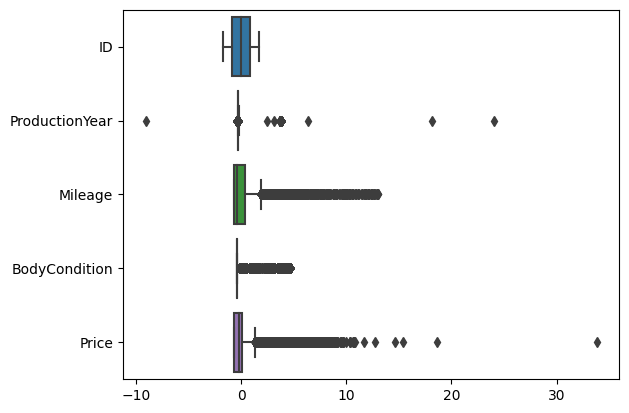

In [39]:
import seaborn as sns
sns.boxplot(data=z, orient="h")

<Axes: xlabel='Mileage', ylabel='Price'>

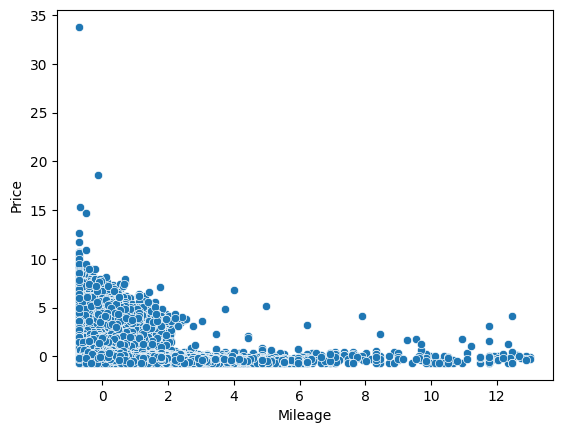

In [40]:
    sns.scatterplot(x=z['Mileage'], y=z['Price'])

## 3. IQR


In [45]:
price_col = df['Price']
q1 = np.percentile(price_col, 25)
q3 = np.percentile(price_col, 75)
iqr = q3 - q1


In [42]:
print("The IQR for the 'price' column is:", iqr)

The IQR for the 'price' column is: 14686582.0


In [52]:
df

,ID,Date,ProductionYear,Mileage,BodyCondition,Price
0,122631,2011-09-22,1386,44000,1,20811199
1,115825,2011-07-17,1386,73000,1,0
2,129927,2011-09-24,1388,45000,1,22061121
3,148726,2012-01-17,1387,60000,1,23748515
4,117507,2011-11-24,1390,0,1,0
...,...,...,...,...,...,...
170984,84383,2011-03-30,1383,111000,14,0
170985,26661,2010-02-05,1382,160000,14,4812199
170986,10446,2010-01-02,1385,86000,14,5593400
170987,68097,2011-01-20,1383,140000,14,9374414


In [53]:
filtered = df.query('(@q1 - 1.5 * @iqr) <= Price <= (@q3 + 1.5 * @iqr)')

<Axes: >

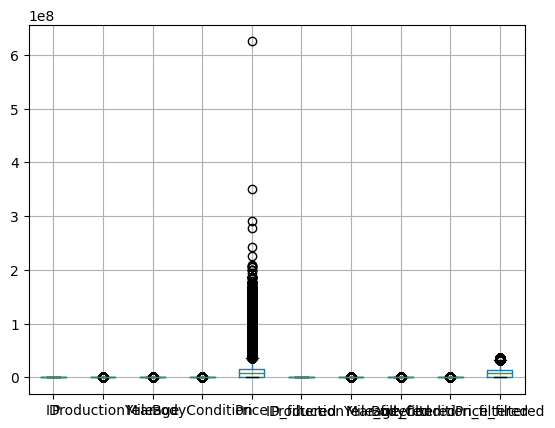

In [54]:
df.join(filtered, rsuffix='_filtered').boxplot()


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170989 entries, 0 to 170988
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ID              170989 non-null  int64         
 1   Date            170989 non-null  datetime64[ns]
 2   Company         170936 non-null  object        
 3   Model           170989 non-null  object        
 4   Detail          170989 non-null  object        
 5   ProductionYear  170989 non-null  int64         
 6   Mileage         170989 non-null  int64         
 7   BodyCondition   170989 non-null  int64         
 8   Price           170989 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 11.7+ MB


# Categorical Features

In [70]:
#One-hot
one_hot = pd.get_dummies(data['BodyCondition'])

In [71]:
df = pd.concat([df, one_hot], axis=1)

In [78]:
df.head()

,ID,Date,ProductionYear,Mileage,BodyCondition,Price,C-1,C-2,C-3,C-4,...,9,10,11,12,13,14,15,16,17,18
0,122631,2011-09-22,1386,44000,1,20811199,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,115825,2011-07-17,1386,73000,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,129927,2011-09-24,1388,45000,1,22061121,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,148726,2012-01-17,1387,60000,1,23748515,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,117507,2011-11-24,1390,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170989 entries, 0 to 170988
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ID              170989 non-null  int64         
 1   Date            170989 non-null  datetime64[ns]
 2   Company         170936 non-null  object        
 3   Model           170989 non-null  object        
 4   Detail          170989 non-null  object        
 5   ProductionYear  170989 non-null  int64         
 6   Mileage         170989 non-null  int64         
 7   BodyCondition   170989 non-null  int64         
 8   Price           170989 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 11.7+ MB


In [75]:
data['Company'].value_counts()

C-4    116391
C-3     43436
C-5     11050
C-2        40
C-1        12
x-4         5
c-4         1
Nan         1
Name: Company, dtype: int64

In [94]:
mapping = {
    'C-4':1,
    'C-3':2,
    'C-5':3,
    'C-2':4,
    'C-1':5,
    'x-4':6,
    'c-4':7
}

In [95]:
data['Company'] = data['Company'].replace(mapping)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170989 entries, 0 to 170988
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID              170989 non-null  int64 
 1   Date            170989 non-null  object
 2   Company         170936 non-null  object
 3   Model           170989 non-null  object
 4   Detail          170989 non-null  object
 5   ProductionYear  170989 non-null  int64 
 6   Mileage         170989 non-null  int64 
 7   BodyCondition   170989 non-null  int64 
 8   Price           170989 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 11.7+ MB


In [91]:
data.drop(['Model','Detail'], axis=1,inplace=True)
data.fillna(data.mean(), inplace=True)

In [100]:
data = data.dropna()

In [101]:
print(data.isnull().sum())

ID                0
Date              0
Company           0
Model             0
Detail            0
ProductionYear    0
Mileage           0
BodyCondition     0
Price             0
dtype: int64


In [102]:
data.fillna(data.median(), inplace=True)

/var/folders/n3/g8v2fwc15611w5_sqtq9z70w0000gn/T/ipykernel_833/421635383.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


In [104]:
#kmeans filling miss value
df_missing = data.copy()
df_missing.fillna(0, inplace=True)

In [105]:
X = df_missing.select_dtypes(include=np.number)

In [106]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [108]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)

/Users/mostafanikoo/carprdiect/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [109]:
df_clustered = pd.DataFrame(X)
df_clustered['Cluster'] = labels
df_clustered = pd.concat([df_clustered, df.select_dtypes(exclude=np.number)], axis=1)
df_clustered = df_clustered[df_clustered['Cluster'] != -1]

In [110]:
for cluster in df_clustered['Cluster'].unique():
    df_cluster = df_clustered[df_clustered['Cluster'] == cluster]
    df_cluster.fillna(df_cluster.mean(), inplace=True)
    df_clustered[df_clustered['Cluster'] == cluster] = df_cluster

/var/folders/n3/g8v2fwc15611w5_sqtq9z70w0000gn/T/ipykernel_833/1977907771.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_cluster.fillna(df_cluster.mean(), inplace=True)
/var/folders/n3/g8v2fwc15611w5_sqtq9z70w0000gn/T/ipykernel_833/1977907771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster.fillna(df_cluster.mean(), inplace=True)
/var/folders/n3/g8v2fwc15611w5_sqtq9z70w0000gn/T/ipykernel_833/1977907771.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_cluster.fillna(df_cluster.mean(), inplace=True)
/var/folders/n3/g8v2fwc15

In [112]:
df_clustered.head()

,ID,ProductionYear,Mileage,BodyCondition,Price,Cluster,Date
0,122631,1386,44000,1,20811199,5,2011-09-22
1,115825,1386,73000,1,0,5,2011-07-17
2,129927,1388,45000,1,22061121,5,2011-09-24
3,148726,1387,60000,1,23748515,3,2012-01-17
4,117507,1390,0,1,0,5,2011-11-24


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170989 entries, 0 to 170988
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID              170989 non-null  int64 
 1   Date            170989 non-null  object
 2   Company         170936 non-null  object
 3   Model           170989 non-null  object
 4   Detail          170989 non-null  object
 5   ProductionYear  170989 non-null  int64 
 6   Mileage         170989 non-null  int64 
 7   BodyCondition   170989 non-null  int64 
 8   Price           170989 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 11.7+ MB


# normalization


In [115]:
scaler = MinMaxScaler()


data[['BodyCondition', 'Price']] = scaler.fit_transform(data[['BodyCondition', 'Price']])

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170989 entries, 0 to 170988
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              170989 non-null  int64  
 1   Date            170989 non-null  object 
 2   Company         170936 non-null  object 
 3   Model           170989 non-null  object 
 4   Detail          170989 non-null  object 
 5   ProductionYear  170989 non-null  int64  
 6   Mileage         170989 non-null  int64  
 7   BodyCondition   170989 non-null  float64
 8   Price           170989 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 11.7+ MB


In [117]:
data.head()

,ID,Date,Company,Model,Detail,ProductionYear,Mileage,BodyCondition,Price
0,122631,22/9/2011,C-4,M-14,D-10,1386,44000,0.0,0.0333
1,115825,17/7/2011,C-4,M-14,D-10,1386,73000,0.0,0.0000
2,129927,24/9/2011,C-4,M-14,D-10,1388,45000,0.0,0.0353
3,148726,17/1/2012,C-4,M-14,D-10,1387,60000,0.0,0.0380
4,117507,24/11/2011,C-4,M-14,D-10,1390,0,0.0,0.0000


# Standardization

In [119]:
from sklearn.preprocessing import StandardScaler
num_cols = ['Price', 'BodyCondition','Mileage','ProductionYear']

In [121]:
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

In [122]:
data.head()

,ID,Date,Company,Model,Detail,ProductionYear,Mileage,BodyCondition,Price
0,122631,22/9/2011,C-4,M-14,D-10,-0.264720,-0.091022,-0.373315,0.476959
1,115825,17/7/2011,C-4,M-14,D-10,-0.264720,0.311214,-0.373315,-0.670914
2,129927,24/9/2011,C-4,M-14,D-10,-0.251642,-0.077151,-0.373315,0.545901
3,148726,17/1/2012,C-4,M-14,D-10,-0.258181,0.130902,-0.373315,0.638971
4,117507,24/11/2011,C-4,M-14,D-10,-0.238563,-0.701311,-0.373315,-0.670914


# Feature Engineering 
## 1.log

In [3]:
data['log_price'] = np.log(data['Price'])


/Users/mostafanikoo/carprdiect/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [7]:
data.head()

,ID,Date,Company,Model,Detail,ProductionYear,Mileage,BodyCondition,Price,log_price,feature_log
0,122631,22/9/2011,C-4,M-14,D-10,1386,44000,1,20811199,16.851002,16.851002
1,115825,17/7/2011,C-4,M-14,D-10,1386,73000,1,0,-inf,0.000000
2,129927,24/9/2011,C-4,M-14,D-10,1388,45000,1,22061121,16.909327,16.909327
3,148726,17/1/2012,C-4,M-14,D-10,1387,60000,1,23748515,16.983031,16.983031
4,117507,24/11/2011,C-4,M-14,D-10,1390,0,1,0,-inf,0.000000


In [6]:
np.seterr(divide = 'ignore')
data['feature_log'] = np.where(data['Price']>0, np.log(data['Price']), 0)

## 2. sqrt


In [8]:
data['price_sqrt'] = np.sqrt(data['Price'])

In [9]:
data.head()

,ID,Date,Company,Model,Detail,ProductionYear,Mileage,BodyCondition,Price,log_price,feature_log,price_sqrt
0,122631,22/9/2011,C-4,M-14,D-10,1386,44000,1,20811199,16.851002,16.851002,4561.929307
1,115825,17/7/2011,C-4,M-14,D-10,1386,73000,1,0,-inf,0.000000,0.000000
2,129927,24/9/2011,C-4,M-14,D-10,1388,45000,1,22061121,16.909327,16.909327,4696.926761
3,148726,17/1/2012,C-4,M-14,D-10,1387,60000,1,23748515,16.983031,16.983031,4873.244812
4,117507,24/11/2011,C-4,M-14,D-10,1390,0,1,0,-inf,0.000000,0.000000


## 3.squre

In [10]:
data['price_square'] = np.square(data['Price'])

In [14]:
data.head()

,ID,Date,Company,Model,Detail,ProductionYear,Mileage,BodyCondition,Price,log_price,feature_log,price_sqrt,price_square
0,122631,2011-09-22,C-4,M-14,D-10,1386,44000,1,20811199,16.851002,16.851002,4561.929307,433106003817601
1,115825,2011-07-17,C-4,M-14,D-10,1386,73000,1,0,-inf,0.000000,0.000000,0
2,129927,2011-09-24,C-4,M-14,D-10,1388,45000,1,22061121,16.909327,16.909327,4696.926761,486693059776641
3,148726,2012-01-17,C-4,M-14,D-10,1387,60000,1,23748515,16.983031,16.983031,4873.244812,563991964705225
4,117507,2011-11-24,C-4,M-14,D-10,1390,0,1,0,-inf,0.000000,0.000000,0


## 4.Feature Base on Time

In [13]:
data['Date'] = pd.to_datetime(data['Date'])

/var/folders/n3/g8v2fwc15611w5_sqtq9z70w0000gn/T/ipykernel_1051/1453708669.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


In [16]:
data['hour'] = data['Date'].dt.hour
data['day_of_week'] = data['Date'].dt.dayofweek
data['month'] = data['Date'].dt.month
data['quarter'] = data['Date'].dt.quarter
data['year'] = data['Date'].dt.year

In [17]:
data.head()

,ID,Date,Company,Model,Detail,ProductionYear,Mileage,BodyCondition,Price,log_price,feature_log,price_sqrt,price_square,hour,day_of_week,month,quarter,year
0,122631,2011-09-22,C-4,M-14,D-10,1386,44000,1,20811199,16.851002,16.851002,4561.929307,433106003817601,0,3,9,3,2011
1,115825,2011-07-17,C-4,M-14,D-10,1386,73000,1,0,-inf,0.000000,0.000000,0,0,6,7,3,2011
2,129927,2011-09-24,C-4,M-14,D-10,1388,45000,1,22061121,16.909327,16.909327,4696.926761,486693059776641,0,5,9,3,2011
3,148726,2012-01-17,C-4,M-14,D-10,1387,60000,1,23748515,16.983031,16.983031,4873.244812,563991964705225,0,1,1,1,2012
4,117507,2011-11-24,C-4,M-14,D-10,1390,0,1,0,-inf,0.000000,0.000000,0,0,3,11,4,2011


## 5.Binning

In [31]:
bin_edges = [0, 1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000]

bin_labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k', '80k-90k', '90k-100k']
data['Price_Binned'] = pd.cut(data['Price'], bins=bin_edges, labels=bin_labels)

print(data['Price_Binned'].head())

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Price_Binned, dtype: category
Categories (10, object): ['0-10k' < '10k-20k' < '20k-30k' < '30k-40k' ... '60k-70k' < '70k-80k' < '80k-90k' < '90k-100k']


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170989 entries, 0 to 170988
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ID              170989 non-null  int64         
 1   Date            170989 non-null  datetime64[ns]
 2   Company         170936 non-null  object        
 3   Model           170989 non-null  object        
 4   Detail          170989 non-null  object        
 5   ProductionYear  170989 non-null  int64         
 6   Mileage         170989 non-null  int64         
 7   BodyCondition   170989 non-null  int64         
 8   Price           170989 non-null  int64         
 9   log_price       170989 non-null  float64       
 10  feature_log     170989 non-null  float64       
 11  price_sqrt      170989 non-null  float64       
 12  price_square    170989 non-null  int64         
 13  hour            170989 non-null  int64         
 14  day_of_week     170989 non-null  int

In [33]:
data.Price_Binned

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
170984         NaN
170985     40k-50k
170986     50k-60k
170987    90k-100k
170988         NaN
Name: Price_Binned, Length: 170989, dtype: category
Categories (10, object): ['0-10k' < '10k-20k' < '20k-30k' < '30k-40k' ... '60k-70k' < '70k-80k' < '80k-90k' < '90k-100k']

In [30]:
unique_values = data['Price_Binned'].unique()
unique_values

[NaN, '0-10k', '90k-100k', '60k-70k', '40k-50k', ..., '70k-80k', '80k-90k', '50k-60k', '10k-20k', '20k-30k']
Length: 11
Categories (10, object): ['0-10k' < '10k-20k' < '20k-30k' < '30k-40k' ... '60k-70k' < '70k-80k' < '80k-90k' < '90k-100k']

In [34]:
unique_values = data['Price_Binned'].unique()
unique_values

[NaN, '80k-90k', '70k-80k', '90k-100k', '50k-60k', ..., '40k-50k', '20k-30k', '30k-40k', '10k-20k', '0-10k']
Length: 11
Categories (10, object): ['0-10k' < '10k-20k' < '20k-30k' < '30k-40k' ... '60k-70k' < '70k-80k' < '80k-90k' < '90k-100k']

In [35]:
data['Price_Binned'].value_counts()

90k-100k    9035
50k-60k     7793
70k-80k     7588
80k-90k     7548
60k-70k     7422
40k-50k     5411
30k-40k     3229
20k-30k     1400
10k-20k      221
0-10k         65
Name: Price_Binned, dtype: int64

## 6.Discretization

In [36]:
data['price_bins'] = pd.cut(data['Price'], bins=3, labels=['low', 'medium', 'high'])


In [37]:
data['price_bins']

0         low
1         low
2         low
3         low
4         low
         ... 
170984    low
170985    low
170986    low
170987    low
170988    low
Name: price_bins, Length: 170989, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

## 7.feature selection

In [14]:
#l1-based feature selection
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler 
X = df.drop('Price', axis=1)
y = df['Price']

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
selector = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear'))
selector.fit(X_scaled, y)
selected_features = X.columns[selector.get_support()].tolist()
print(selected_features)

['ID', 'ProductionYear', 'Mileage', 'BodyCondition']


In [9]:
data.info()
df = data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170989 entries, 0 to 170988
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID              170989 non-null  int64 
 1   Date            170989 non-null  object
 2   Company         170936 non-null  object
 3   Model           170989 non-null  object
 4   Detail          170989 non-null  object
 5   ProductionYear  170989 non-null  int64 
 6   Mileage         170989 non-null  int64 
 7   BodyCondition   170989 non-null  int64 
 8   Price           170989 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 11.7+ MB


In [13]:
df.drop(['Company'], axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170989 entries, 0 to 170988
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   ID              170989 non-null  int64
 1   ProductionYear  170989 non-null  int64
 2   Mileage         170989 non-null  int64
 3   BodyCondition   170989 non-null  int64
 4   Price           170989 non-null  int64
dtypes: int64(5)
memory usage: 6.5 MB


In [16]:
#Univariate feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [17]:
X_new = SelectKBest(f_classif, k=2).fit_transform(X, y)

In [18]:
X_new.shape

(170989, 2)

In [19]:
X.shape

(170989, 4)

In [20]:
#random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
model = rf.fit(X, y)


<Axes: >

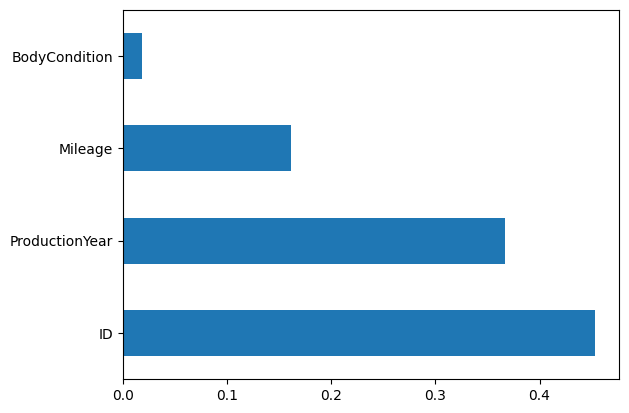

In [21]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)
importances_sorted[:10].plot(kind='barh')

## Model Selection

In [25]:
import statsmodels.api as sm
X = sm.add_constant(X) # add intercept term
model = sm.OLS(y, X).fit()


In [27]:
k = len(model.params)
L = model.llf
AIC = 2*k - 2*L

print('AIC :' , AIC)

AIC : 6124484.913359755


In [30]:
#BIC = k * ln(n) - 2 * ln(L)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
num_params = len(model.coef_) + 1
residuals = y - model.predict(X)
sigma = np.std(residuals)
log_likelihood = -len(X) / 2 * np.log(2 * np.pi * sigma**2) - 1 / (2 * sigma**2) * np.sum(residuals**2)
n = len(X)
bic = num_params * np.log(n) - 2 * log_likelihood

print('BIC:', bic)

BIC: 6124547.209486789


## model tuning

In [39]:
#grid search
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

param_grid = {
    'max_depth': [1,5,10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=4,n_jobs=-1)
grid_search.fit(X, y)

print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

/Users/mostafanikoo/carprdiect/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


Best hyperparameters: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy score: 0.287269941370732


In [43]:
#random Search
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter space
param_dist = {'n_estimators': randint(100, 1000),
              'max_features': ['sqrt', 'log2', None],
              'max_depth': randint(10, 100),
              'min_samples_split': randint(2, 20),
              'min_samples_leaf': randint(1, 10)}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Initialize random search
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10,
                               cv=5, random_state=42)

# Fit random search to the data
rf_random.fit(X, y)

# Print the best hyperparameters
print(rf_random.best_params_)

KeyboardInterrupt: 

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170989 entries, 0 to 170988
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ID              170989 non-null  int64 
 1   Date            170989 non-null  object
 2   Company         170936 non-null  object
 3   Model           170989 non-null  object
 4   Detail          170989 non-null  object
 5   ProductionYear  170989 non-null  int64 
 6   Mileage         170989 non-null  int64 
 7   BodyCondition   170989 non-null  int64 
 8   Price           170989 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 11.7+ MB


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
X = data[['ProductionYear', 'Mileage', 'BodyCondition']]
y = data['Price']

# fit a linear regression model
model = LinearRegression().fit(X, y)

# make predictions
y_pred = model.predict(X)

# calculate the explained variance
evs = explained_variance_score(y, y_pred)

print('Explained variance:', evs)

Explained variance: 0.3243709819847317


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(df.drop('Price', axis=1), df['Price'], test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)

print("MSE:", mse)

MSE: 211538165695532.16


In [51]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

MAE: 8431776.377420513


In [53]:
from sklearn.metrics import mean_absolute_percentage_error
ape = abs((y_test - y_pred) / y_test)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape}")

MAPE: 1.671926572347402e+22


In [55]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

R2 score: 0.3353232714177884
